# D. Tipos de datos en DataFrames
¿Qué tipos de datos puede manejar un DataFrame?

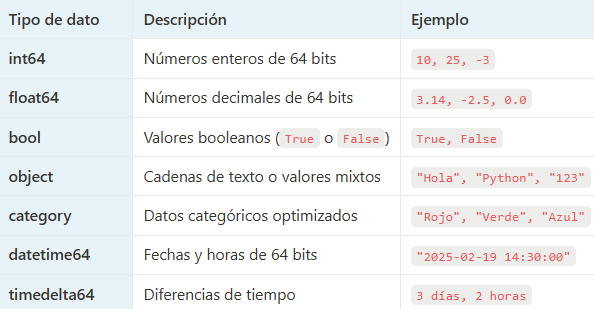

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Crear un DataFrame con diferentes tipos de datos
df = pd.DataFrame({
    'Entero': [10, 20, 30],          # int64
    'Decimal': [2.5, 3.7, 4.1],      # float64
    'Texto': ['Hola', 'Mundo', 'Pandas'],  # object
    'Booleano': [True, False, True], # bool
    'Categoría': pd.Categorical(['A', 'B', 'A']), # category
    'Fecha': pd.to_datetime(['2025-01-01', '2025-02-01', '2025-03-01']) # datetime64
})

print(df.dtypes)

Entero                int64
Decimal             float64
Texto                object
Booleano               bool
Categoría          category
Fecha        datetime64[ns]
dtype: object


### 1. Object (Datos mixtos)

Las columnas de tipo **`object`** generalmente contienen **texto**, aunque también pueden incluir datos mixtos. Se almacenan como **`object`**, y debemos tener en cuenta que pueden ralentizar nuestras operaciones.

In [4]:
# Crear un DataFrame con una columna object
df_mixto = pd.DataFrame({
    'Mixto': [10, 'Texto', 3.5, True]
})

print(df_mixto.dtypes)  # Mostrará 'object'

Mixto    object
dtype: object


En este tipo de columnas es importante limpiarla y convertirla al tipo adecuado antes de realizar operaciones.

In [6]:
# Partimos de un DataFrame con una columna de tipo object
df_mixto = pd.DataFrame({
    'Mixto': [10, 'Texto', 3.5, True]
})

print(df_mixto.dtypes)  # Mostrará 'object'

# Convertimos los valores de la columna con pd.to_numeric()
df_mixto['Datos'] = pd.to_numeric(df_mixto['Mixto'], errors='coerce')   # Convierte los valores numéricos, dejando NaN si no es posible. Podríamos utilizar errors='ignore' pero con MUCHO cuidado, ya que si hay valores no numéricos, Pandas no los convierte y los deja tal cual.

# También podríamos convertir los valores de la columna con .astype()
#df_mixto['Datos'] = df_mixto['Mixto'].astype(float, errors='ignore') 

# O reemplazar valores problemáticos de forma manual....
#df_mixto['Mixto'] = df_mixto['Mixto'].replace({'Texto': np.nan, True: 1})
#df_mixto['Datos'] = df_mixto['Mixto'].astype(float)

df_mixto
print(df_mixto.dtypes) 

# Ahora podemos hacer filtrado booleano
df_mixto['Mayor5'] = df_mixto['Datos'] > 5 #Cómo por ejemplo filtrar datos

# Filtrado de datos
df_filtrado = df_mixto[df_mixto['Datos'] > 5] 
df_mixto['Filtrados'] = df_filtrado['Datos'] # O almacenar valores en función de una condición booleana

# U operaciones matemáticas
df_doble = df_mixto['Datos'] * 2 # O realizar operaciones matemáticas
df_mixto['Doble'] = df_doble 

df_mixto

Mixto    object
dtype: object
Mixto     object
Datos    float64
dtype: object


,Mixto,Datos,Mayor5,Filtrados,Doble
0,10,10.0,True,10.0,20.0
1,Texto,NaN,False,NaN,NaN
2,3.5,3.5,False,NaN,7.0
3,True,1.0,False,NaN,2.0


### 2. Category (variables categóricas)

Pandas tiene un tipo de dato especial llamado **`category`** para manejar variables categóricas. .

- **Eficiencia de memoria**: Las categorías se almacenan internamente como códigos enteros, lo que nos ayuda a ahorrar espacio, especialmente con columnas de texto que contienen muchos valores repetidos.
- **Mejor rendimiento**: Operaciones como comparaciones, agrupamiento y agregación suelen ser más rápidas cuando se usa este tipo de datos categóricos.

En problemas de **clasificación supervisada**, las categorías suelen corresponder a las etiquetas que se predicen. Por ejemplo, si estás clasificando imágenes de frutas, las categorías podrían ser "Manzana", "Banana", "Naranja", etc. En estos casos, las categorías son utilizadas como las salidas esperadas (o etiquetas) del modelo.

En el caso de un DataFrame con una columna categórica, estas categorías pueden ser directamente las clases que el modelo debe predecir.

In [7]:
# Crear un DataFrame con frutas
data = {'Fruta': ['Manzana', 'Banana', 'Naranja', 'Manzana', 'Naranja'],
        'Color': ['Rojo', 'Amarillo', 'Naranja', 'Verde', 'Naranja']}
df = pd.DataFrame(data)

# Ver tipos de datos antes de la conversión
print(df.dtypes)

# Convertir 'Fruta' a categoría (etiqueta de clasificación)
df['Fruta'] = df['Fruta'].astype('category')

# Ver tipos de datos después de la conversión
print(df.dtypes)

# Acceder a las categorías de 'Fruta'
print(df['Fruta'].cat.categories) #En este ejemplo, la columna Fruta es la etiqueta que el modelo intentará predecir, y las categorías en esta columna son las clases posibles.

# Mostrar los códigos de cada categoría en 'Fruta'
print(df['Fruta'].cat.codes) # Este índice puede ser utilizado por el modelo para identificar las clases o etiquetas específicas

Fruta    object
Color    object
dtype: object
Fruta    category
Color      object
dtype: object
Index(['Banana', 'Manzana', 'Naranja'], dtype='object')
0    1
1    0
2    2
3    1
4    2
dtype: int8


Para alimentar estos datos a un modelo de IA, es común **codificar las categorías** en un formato numérico, ya que la mayoría de los modelos de IA no pueden manejar directamente las cadenas de texto. Dependiendo del tipo de modelo y la naturaleza de los datos, puedes usar diferentes enfoques para transformar las etiquetas categóricas:

- **Label Encoding**: Asigna un valor numérico único a cada categoría.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

# Codificar la columna 'Fruta'
df['Fruta_Codificada'] = label_encoder.fit_transform(df['Fruta']) # Codifica las etiquetas categóricas en números, donde cada número representa una categoría única.

print(df)

     Fruta     Color  Fruta_Codificada
0  Manzana      Rojo                 1
1   Banana  Amarillo                 0
2  Naranja   Naranja                 2
3  Manzana     Verde                 1
4  Naranja   Naranja                 2


-   **One-Hot Encoding**: Crea una columna binaria para cada categoría, donde un valor de 1 indica la presencia de la categoría y 0 su ausencia.

In [ ]:
# Convertir una columna categórica en varias columnas binarias.
df_one_hot = pd.get_dummies(df['Fruta']) # Las categorías "Manzana", "Banana", "Naranja" se convierten en columnas binarias. Este es un enfoque común si las categorías no tienen un orden implícito y se quieren tratar como variables independientes.
print(df_one_hot)

-   Resumen de los 3 métodos de codificación de variables categóricas para modelos de IA

| Método             | Descripción | Cuándo utilizarlo | Ventajas | Desventajas |
|--------------------|------------|-------------------|----------|-------------|
| **Label Encoding** | Asocia un número único a cada categoría. Por ejemplo, `'Rojo' -> 0, 'Verde' -> 1, 'Azul' -> 2`. | - Modelos basados en árboles (ej., Random Forest, XGBoost).<br>- Cuando las categorías tienen un **orden** inherente o implícito (ej., clasificación de rango). | - Es rápido y eficiente en términos de memoria.<br>- Adecuado cuando las categorías son **ordinales**. | - No funciona bien para **variables categóricas nominales** sin orden, ya que puede inducir relaciones erróneas de mayor o menor (ej., `'Rojo' no debería ser mayor que 'Verde'`). |
| **One Hot Encoding** | Crea una columna binaria por cada categoría, donde un valor de `1` indica la presencia de esa categoría. | - Modelos lineales (ej., regresión logística, redes neuronales).<br>- Cuando las categorías son **nominales** (sin orden) y se desea evitar relaciones erróneas. | - No induce relaciones entre categorías (**ideal para variables nominales**).<br>- Adecuado para muchos modelos. | - Puede generar un **número grande de columnas** si hay muchas categorías (problema de "alta dimensionalidad").<br>- Consume más memoria. |
| **Índices Manuales** | Asigna índices específicos a las categorías, dependiendo del conocimiento del dominio o el contexto. | - Cuando se tiene un **conocimiento experto** sobre las categorías y su relación con el objetivo.<br>- En situaciones donde se desea un **control completo** sobre la codificación. | - Puede ser útil cuando se tienen categorías con una relación directa con otras variables. | - Es propenso a errores si las relaciones no están bien definidas.<br>- No es escalable ni generalizable sin conocimiento específico de los datos. |


Podemos renombrar categorías utilizando el atributo cat.rename_categories().

In [ ]:
# Renombrar las categorías
df['Fruta'] = df['Fruta'].cat.rename_categories(['Fruta1', 'Fruta2', 'Fruta3'])

print(df)

También podemos ordenar las categorías, por ejemplo, cuando las categoría tienen un orden lógico ('Bajo', 'Medio', 'Alto’).

In [ ]:
# Crear DataFrame de ejemplo con categorías ordenadas
data = {'Nivel': ['Medio', 'Bajo', 'Alto', 'Medio', 'Bajo']}
df = pd.DataFrame(data)

# Convertir la columna 'Nivel' a tipo 'category' con un orden específico
df['Nivel'] = pd.Categorical(df['Nivel'], categories=['Bajo', 'Medio', 'Alto'], ordered=True) # La función pd.Categorical() en pandas se utiliza para convertir una columna o serie a un tipo de dato categórico. El parámetro ordered=True indica que las categorías definidas tienen un orden específico (predeterminado en False


print(df)

### 3. Datetime

Pandas nos ofrece varias maneras de **crear columnas con fechas**. Si tienes una lista de fechas en formato de cadena, puedes convertirlas a un formato de fecha utilizando  `pd.to_datetime()`. Por ejemplo, podemos crear una columna fecha a partir de una lista de strings:

In [ ]:
# Lista de fechas en formato de cadena
fechas = ['2025-01-01', '2025-02-01', '2025-03-01']

# Crear DataFrame con una columna datetime
df = pd.DataFrame({'Fecha': pd.to_datetime(fechas)})

print(df)

- **`pd.Timestamp`** representa un instante específico en el tiempo (una fecha y hora exacta). Se usa cuando se necesita registrar eventos con precisión temporal. Se usa para marcar eventos en el tiempo.
- **`pd.Timedelta`** representa una duración o diferencia entre dos momentos en el tiempo. Se usa cuando es necesario calcular intervalos de tiempo o realizar desplazamientos en fechas.
- **`pd.DateOffset`**: Ideal para operaciones que involucran unidades de tiempo más complejas y variables, como años, meses, días laborales, semanas, etc. Por ejemplo, un año puede tener 365 o 366 días dependiendo de si es bisiesto, y un mes puede tener 28, 29, 30 o 31 días. Usar **`DateOffset`** permite sumar o restar estos períodos sin tener que preocuparse por los días exactos del mes o el año.

Si ya tenemos una columna en nuestro DataFrame con **fechas en formato string que queremos transformar a tipo datetime**, podemos utilizar la misma función. Es muy común que al leer los datos desde CSV o Excel las fechas estén representadas como texto. Esta conversión nos permitirá luego trabajar con ellas correctamente.

In [ ]:
# Crear DataFrame con fechas como cadenas
df = pd.DataFrame({
    'Fecha': ['2025-01-01', '2025-02-01', '2025-03-01']
})

# Convertir la columna a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

print(df.dtypes)  # Verificamos el tipo de dato
print(df)


Una vez que tenemos una columna con fechas, puedes realizar operaciones como sumas, restas, y comparaciones.

In [ ]:
# Sumar días a una fecha con Timedelta
df['Fecha_mas_10_dias'] = df['Fecha'] + pd.Timedelta(days=10)

# Restar fechas (diferencia de días) con Timedelta
df['Diferencia'] = df['Fecha_mas_10_dias'] - df['Fecha']

print(df)

# Crear una fecha
fecha = pd.to_datetime('2025-01-01 12:00:00') # Crear una fecha y hora a partir de una cadena usando pd.to_datetime()
fecha = pd.Timestamp('2025-01-01 12:00:00') # Alternativamente, podemos crear directamente un objeto Timestamp
print(fecha) # Ambas opciones generan el mismo resultado: un punto específico en el tiempo
pd.Timestamp(2017, 1, 1, 12) # Esto es lo mismo que: pd.Timestamp(year=2017, month=1, day=1, hour=12)
pd.Timestamp(1513393355, unit='s', tz='US/Pacific') # Esto crea un objeto de marca de tiempo (timestamp) a partir de un número entero, interpretándolo como un tiempo en segundos desde la época de Unix (1 de enero de 1970)

# Sumar 5 días y 3 horas con Timedelta
nueva_fecha = fecha + pd.Timedelta(days=5, hours=3)

print(nueva_fecha)

# Sumar 90 minutos con Timedelta
nueva_fecha = fecha + pd.Timedelta(minutes=90)

print(nueva_fecha)

# Sumar 120 segundos con Timedelta
nueva_fecha = fecha + pd.Timedelta(seconds=120)

print(nueva_fecha) 

# Crear dos fechas
fecha1 = pd.to_datetime('2025-01-01')
fecha2 = pd.to_datetime('2025-01-10')

# Obtener la diferencia en días
diferencia = (fecha2 - fecha1).days

print(diferencia)

# Crear una columna de días
df = pd.DataFrame({'Días': [1, 3, 5]})

# Convertir los días a horas
df['Horas'] = df['Días'] * 24

# Convertir las horas a minutos
df['Minutos'] = df['Horas'] * 60

print(df)

# Sumar 1 año y 2 meses a la fecha con DateOffset
nueva_fecha = fecha + pd.DateOffset(years=1, months=2)
#nueva_fecha2 = fecha + pd.Timedelta(years=1, months=2) Prueba a intentar sumar años y meses con Timedelt

print(nueva_fecha)

| Operación                              | Método / Función                 | Descripción                                                                                                                              | Ejemplo                                                                                                                                                                                      |
| -------------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Sumar o restar días a una fecha        | pd.Timedelta(days=X)             | pd.Timedelta se utiliza para sumar o restar unidades de tiempo como días, horas, etc., a una fecha.                                      | df['Fecha'] + pd.Timedelta(days=10) (suma 10 días a la fecha) df['Fecha'] - pd.Timedelta(days=5) (resta 5 días a la fecha)                                                                   |
| Restar dos fechas                      | df['Fecha1'] - df['Fecha2']      | La resta directa de dos fechas te devuelve la diferencia entre ellas como un objeto Timedelta. Para obtener solo días puedes usar .days. | df['Fecha1'] - df['Fecha2'](diferencia entre dos fechas, resultado es un Timedelta que incluye horas, minutos y segundos) (df['Fecha1'] - df['Fecha2']).dt.days (solo días de la diferencia) |
| Suma de días y horas a una fecha       | pd.Timedelta(days=X, hours=X)    | Sumar tanto días como horas a una fecha.                                                                                                 | df['Fecha'] + pd.Timedelta(days=5, hours=3) (suma 5 días y 3 horas a la fecha)                                                                                                               |
| Restar horas y minutos                 | pd.Timedelta(hours=X, minutes=X) | Restar horas y minutos a una fecha.                                                                                                      | df['Fecha'] - pd.Timedelta(hours=10, minutes=30) (resta 10 horas y 30 minutos de la fecha)                                                                                                   |
| Suma de minutos a una fecha            | pd.Timedelta(minutes=X)          | Sumar minutos a una fecha.                                                                                                               | df['Fecha'] + pd.Timedelta(minutes=90) (suma 90 minutos a la fecha)                                                                                                                          |
| Suma de segundos a una fecha           | pd.Timedelta(seconds=X)          | Sumar segundos a una fecha.                                                                                                              | df['Fecha'] + pd.Timedelta(seconds=120) (suma 120 segundos a la fecha)                                                                                                                       |
| Convertir días en horas                | df['Días'] \* 24                 | Convertir una diferencia de días a horas (24 horas por día).                                                                             | df['Días'] \* 24 (convierte la columna 'Días' a horas multiplicando por 24)                                                                                                                  |
| Suma de fechas con años y meses OFFSET | pd.DateOffset(years=1, months=2) | Sumar años y meses a una fecha (usando DateOffset).                                                                                      | df['Fecha'] + pd.DateOffset(years=1, months=2) (suma 1 año y 2 meses a la fecha)                                                                                                             |